#**UnSupervised Learning**

#**Project: HousePrice**

#**Algorithm: Principle Component Analysis (PCA)**



**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Read the Data using Pandas**

In [ ]:
mydata=pd.read_csv('houseprice.csv')
pd.set_option('max_columns',90)
mydata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

**Check for the Type**

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The Data consists of float64(3), int64(35), object(43)

**Describe the Dataset**

In [ ]:
mydata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Check for NULL**

In [ ]:
mydata.isnull().sum().head(41)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
dtype: int64

In [ ]:
mydata.isnull().sum().tail(41)

HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

**To Remove NULL values**

In [ ]:
mydata["LotFrontage"].fillna(mydata["LotFrontage"].mean(),inplace = True)
mydata["Alley"].fillna("mis",inplace = True)
mydata["BsmtQual"].fillna(mydata["BsmtQual"].mode()[0],inplace = True)
mydata["BsmtCond"].fillna(mydata["BsmtCond"].mode()[0],inplace = True)
mydata["BsmtExposure"].fillna(mydata["BsmtExposure"].mode()[0],inplace = True)
mydata["BsmtFinType1"].fillna(mydata["BsmtFinType1"].mode()[0],inplace = True)
mydata["BsmtFinType2"].fillna(mydata["BsmtFinType2"].mode()[0],inplace = True)
mydata["Electrical"].fillna(mydata["Electrical"].mode()[0],inplace = True)
mydata["FireplaceQu"].fillna("mis",inplace = True)
mydata["GarageType"].fillna(mydata["GarageType"].mode()[0],inplace = True)
mydata["GarageYrBlt"].fillna(round(mydata['GarageYrBlt'].mean()),inplace = True)
mydata["GarageFinish"].fillna(mydata["GarageFinish"].mode()[0],inplace = True)
mydata["GarageQual"].fillna(mydata["GarageQual"].mode()[0],inplace = True)
mydata["GarageCond"].fillna(mydata["GarageCond"].mode()[0],inplace = True)
mydata["PoolQC"].fillna("mis",inplace = True)
mydata["Fence"].fillna("mis",inplace = True)
mydata["MiscFeature"].fillna("mis",inplace = True)
mydata["MasVnrType"].fillna(mydata["MasVnrType"].mode()[0],inplace = True)
mydata["MasVnrArea"].fillna(mydata["MasVnrArea"].mean(),inplace = True)

**Nulls Removed**

In [ ]:
mydata.isnull().sum().head(41)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
dtype: int64

In [ ]:
mydata.isnull().sum().tail(41)

HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

#**Univariate and Bivariate Analysis**

#**Correlation**

In [ ]:
mydata_corr=mydata.corr()
mydata_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000007,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080589,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.063866,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025161,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.516778,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306211,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.779457,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.617587,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.248795,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.149827,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

#**Correlogram**

**HeatMap**

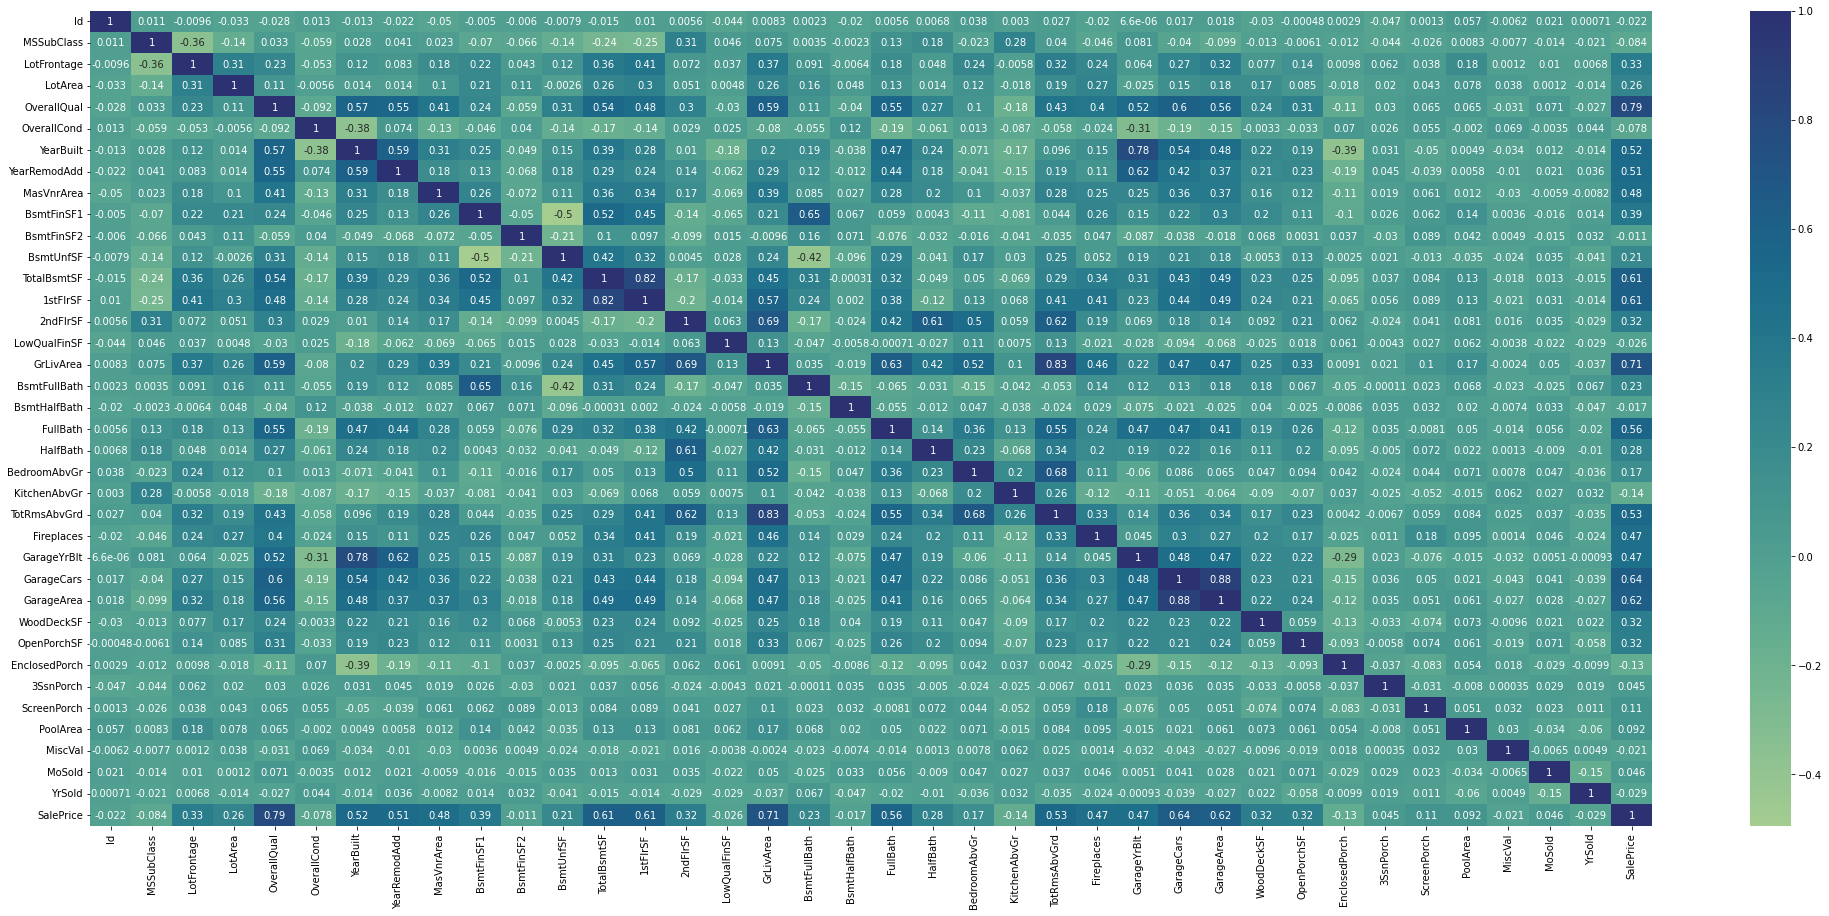

In [ ]:
plt.figure(figsize=(35,15))
sns.heatmap(mydata_corr,annot=True,cmap='crest')
plt.show()

#**Visualization**

#**Graph 1: Kde Plot**

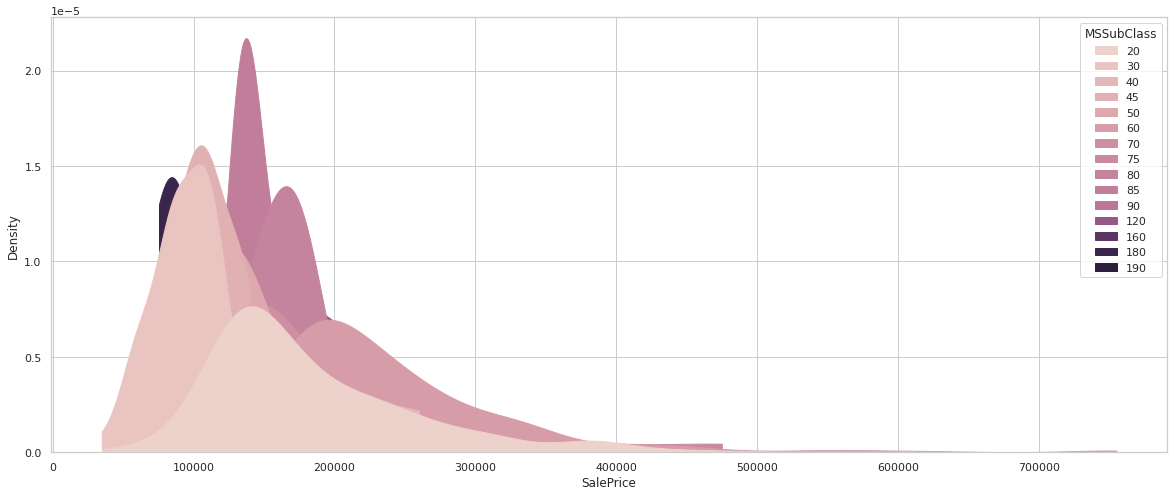

In [ ]:
plt.rcParams["figure.figsize"]=20,8
sns.set(style="whitegrid")
sns.kdeplot(data=mydata, x="SalePrice", hue="MSSubClass", cut=0, fill=True, common_norm=False, alpha=1)
plt.show()

#**Graph 2 : ScatterPlot is Used**

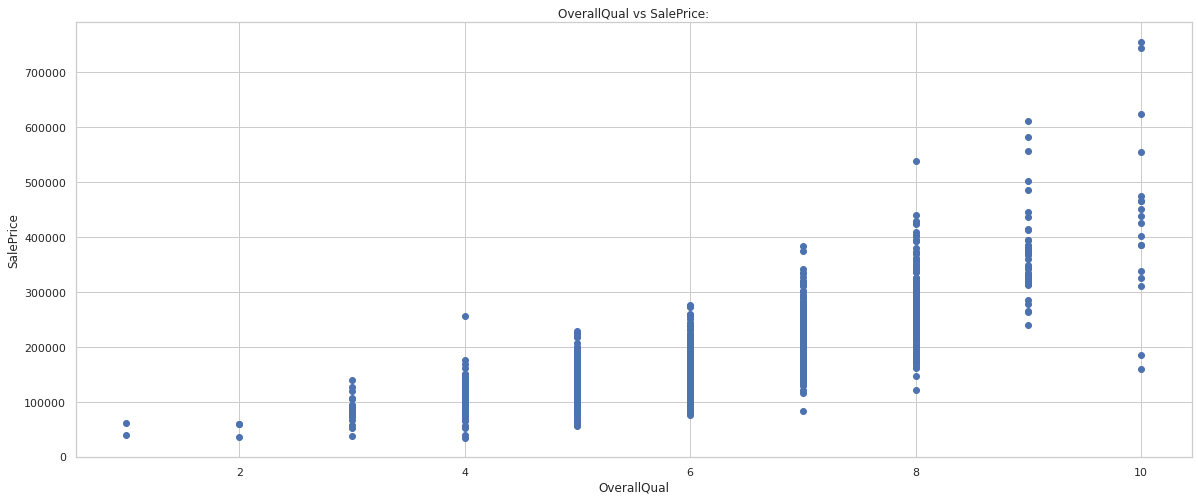

In [ ]:
plt.plot( 'OverallQual', 'SalePrice', "", data=mydata, linestyle='', marker='o')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs SalePrice:')
plt.show()

#**Graph 3 : BubblePlot**

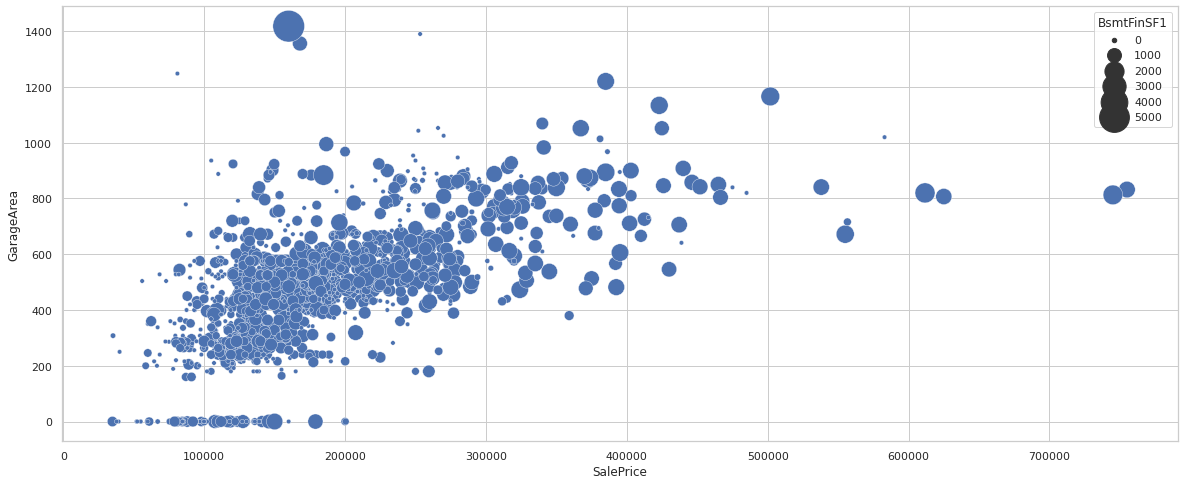

In [ ]:
sns.scatterplot(data=mydata, x="SalePrice", y="GarageArea", size="BsmtFinSF1", legend=True, sizes=(20, 1000))

#**Graph 4 : Three Dimensional Plot**

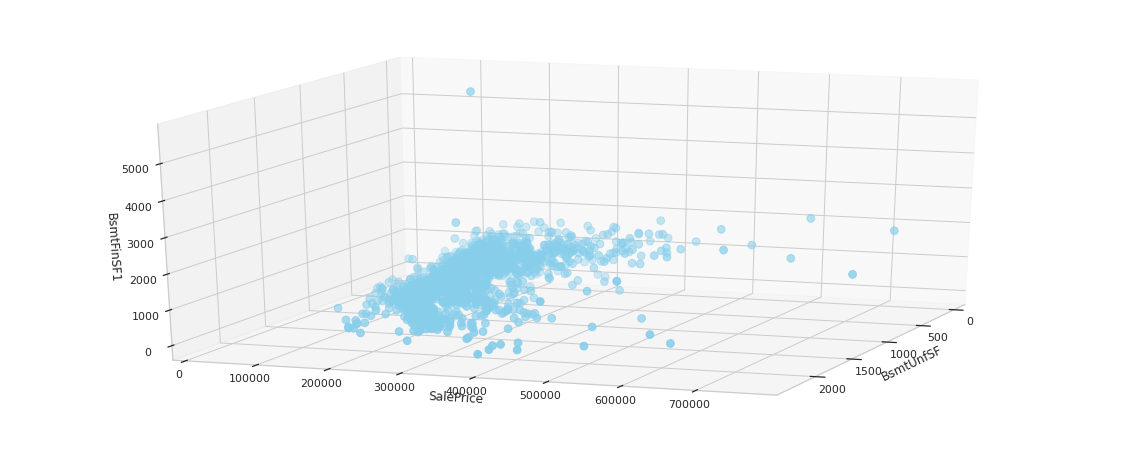

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mydata['BsmtUnfSF'], mydata['SalePrice'], mydata['BsmtFinSF1'], c='skyblue', s=60)
ax.set_xlabel("BsmtUnfSF")
ax.set_ylabel("SalePrice")
ax.set_zlabel("BsmtFinSF1")
ax.view_init(20, 20)
plt.show()

#**Graph 5 : Violin Plot**

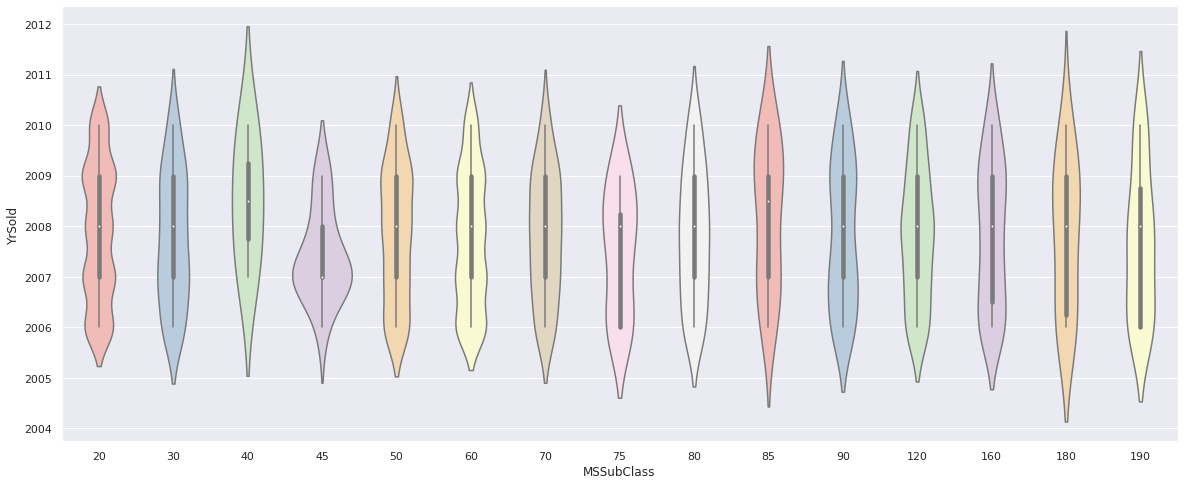

In [ ]:
sns.set(style="darkgrid")
sns.violinplot(x="MSSubClass", y="YrSold", data=mydata, palette="Pastel1")
plt.show()

#**Graph 6 : DistPlot is Used**

<Figure size 1080x576 with 0 Axes>

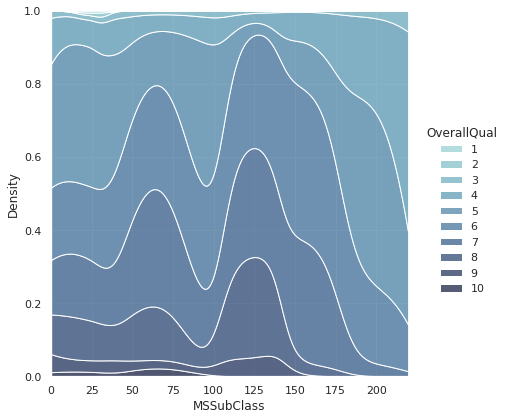

In [ ]:
sns.displot(data=mydata,x="MSSubClass", hue="OverallQual",kind="kde", height=6,multiple="fill", clip=(0, None),palette="ch:rot=-.25,hue=1,light=.75")

#**Data Preprocessing**

**Seperating Independant and Dependant variables**

**independant Variable**

In [ ]:
x_ind=mydata.drop('SalePrice',axis=1)

In [ ]:
x_ind

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,mis,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,mis,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,mis,mis,mis,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,mis,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,mis,mis,mis,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,mis,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,mis,mis,mis,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,mis,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,mis,mis,mis,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,mis,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,mis,mis,mis,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,mis,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,mis,mis,mis,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,mis,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,mis,MnPrv,mis,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,mis,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,mis,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,mis,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,mis,Attchd,1950.0,Un

**Dependant Variable**

In [ ]:
y_dep=mydata.SalePrice

In [ ]:
y_dep

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In the independant Variable, we have object datatype,to convert Object to integer Datatype,Label Encoder is used

#**Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [ ]:
for i in x_ind:
    mydata[i] = LE.fit_transform(mydata[i].astype(str).values)

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int64
 3   LotFrontage    1460 non-null   int64
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   int64
 6   Alley          1460 non-null   int64
 7   LotShape       1460 non-null   int64
 8   LandContour    1460 non-null   int64
 9   Utilities      1460 non-null   int64
 10  LotConfig      1460 non-null   int64
 11  LandSlope      1460 non-null   int64
 12  Neighborhood   1460 non-null   int64
 13  Condition1     1460 non-null   int64
 14  Condition2     1460 non-null   int64
 15  BldgType       1460 non-null   int64
 16  HouseStyle     1460 non-null   int64
 17  OverallQual    1460 non-null   int64
 18  OverallCond    1460 non-null   int64
 19  YearBu

In [ ]:
x_ind=mydata.drop('SalePrice',axis=1)

To Normalize the Datas, Standard scalar is used

#**Normalization**

**Before Normalization - x_ind**

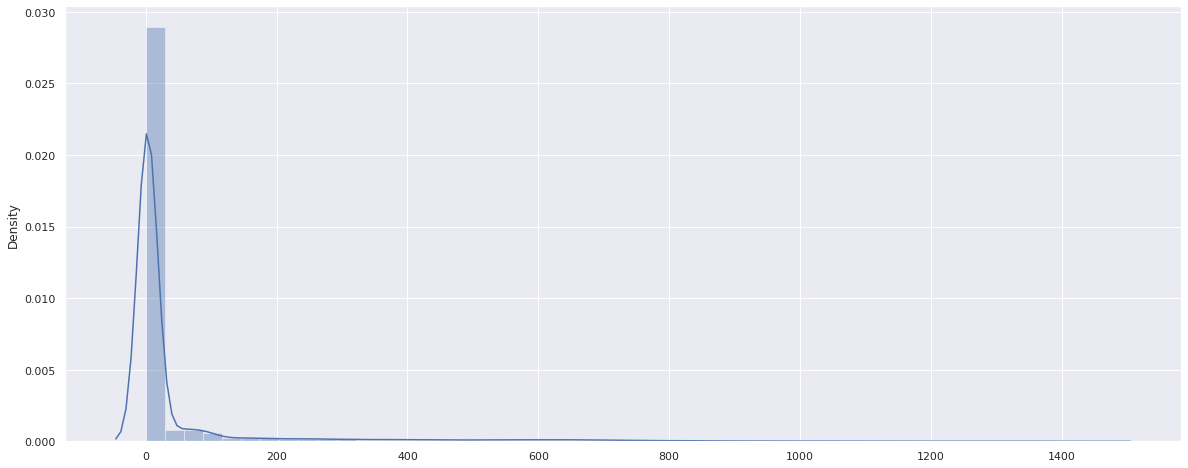

In [ ]:
sns.distplot(x_ind)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
norm=StandardScaler()

In [ ]:
x_norm=norm.fit_transform(x_ind)

**After Normalization - x_ind**

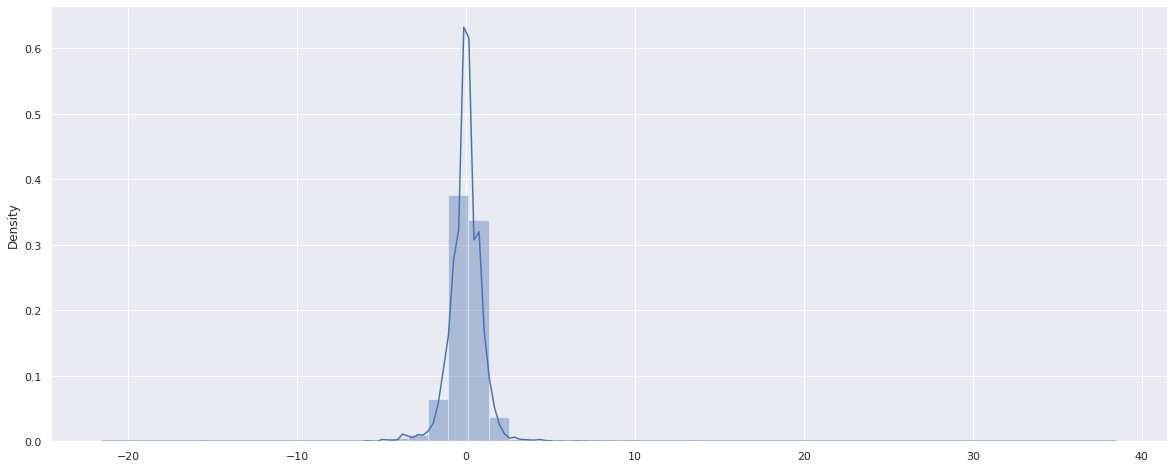

In [ ]:
sns.distplot(x_norm)

#**Train PCA - Principle Component Analysis**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
PCA_Reduce=PCA()

In [ ]:
x_new=PCA_Reduce.fit_transform(x_norm)

In [ ]:
x_new

array([[-2.60848823, -1.19359394,  0.314677  , ..., -0.02117215,
        -0.00486963, -0.00977851],
       [-0.01022705,  2.58557565,  0.4521443 , ...,  0.17855345,
        -0.05202063, -0.13502258],
       [-3.19860393, -1.48465668,  1.40365576, ..., -0.09728433,
        -0.0671897 , -0.05068173],
       ...,
       [-0.49149169, -0.09466274,  2.50479364, ..., -0.08161592,
         0.91531943,  0.27331285],
       [ 2.44896191,  3.04148629, -1.85096038, ...,  0.19725339,
         0.15963454,  0.29153543],
       [ 1.07580535,  3.63390567,  0.23577121, ...,  0.17154784,
         0.01547463,  0.16162578]])

#**Covariance Matrix**

In [ ]:
cov_mat=np.cov(x_norm.T)
cov_mat

array([[ 1.0006854 ,  0.03008051, -0.06594236, ...,  0.02619764,
        -0.01550434, -0.0199563 ],
       [ 0.03008051,  1.0006854 ,  0.01898742, ..., -0.01506027,
         0.07513055, -0.04838619],
       [-0.06594236,  0.01898742,  1.0006854 , ..., -0.02064171,
         0.09750405,  0.00950002],
       ...,
       [ 0.02619764, -0.01506027, -0.02064171, ...,  1.0006854 ,
        -0.00232889,  0.00388309],
       [-0.01550434,  0.07513055,  0.09750405, ..., -0.00232889,
         1.0006854 ,  0.18419272],
       [-0.0199563 , -0.04838619,  0.00950002, ...,  0.00388309,
         0.18419272,  1.0006854 ]])

#**Check for Eigen Values and Eigen Vectors**

In [ ]:
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)

**Eigen Values**

In [ ]:
eigen_vals

array([8.89065699, 3.55970361, 2.95499246, 2.5443603 , 2.38069975,
       2.09379341, 2.01285216, 1.86801146, 1.77620525, 1.68370116,
       1.61948197, 1.55464742, 1.47273544, 1.42663584, 1.39706082,
       1.36499505, 1.325604  , 1.2047735 , 1.19000504, 1.17414029,
       1.15201964, 1.1263768 , 1.12022191, 0.09989762, 1.08696764,
       0.106129  , 1.0694891 , 0.13214371, 0.14779413, 1.04665967,
       1.01362778, 0.99724195, 0.9915339 , 0.18836336, 0.96050156,
       0.93306624, 0.19732942, 0.20762511, 0.21884642, 0.22884314,
       0.91403118, 0.87999797, 0.89654922, 0.25284367, 0.25626855,
       0.2942698 , 0.86208177, 0.845845  , 0.83385016, 0.81388549,
       0.3183747 , 0.33796097, 0.79894219, 0.35219606, 0.78684739,
       0.7663215 , 0.36989533, 0.39110296, 0.40679998, 0.74622406,
       0.41802523, 0.37637495, 0.55174555, 0.72230113, 0.70815268,
       0.50828543, 0.45413878, 0.47522323, 0.56930215, 0.58947623,
       0.49110228, 0.44712641, 0.6979469 , 0.6335376 , 0.48808

**Eigen Vectors**

In [ ]:
eigen_vecs

array([[ 0.00279167, -0.01261144,  0.01320097, ...,  0.09459081,
        -0.06384504,  0.00037408],
       [-0.02936627,  0.18582187,  0.36490023, ...,  0.04564296,
         0.2176738 ,  0.02058633],
       [-0.09768306, -0.00393538,  0.02073738, ..., -0.12578545,
         0.04894128, -0.03108795],
       ...,
       [-0.00481944, -0.03505032, -0.02500796, ...,  0.07563293,
        -0.02791603, -0.01457144],
       [-0.01659123,  0.01866714,  0.06002405, ...,  0.09295621,
        -0.08344355, -0.05021874],
       [ 0.08840145,  0.04019645, -0.04501118, ..., -0.24642886,
         0.00817813, -0.06112938]])

#**Check for Datas that occupied by PCA lines**

**Explained_variance_ratio**

In [ ]:
explained_variance=PCA_Reduce.explained_variance_ratio_

In [ ]:
explained_variance

array([0.11105709, 0.04446582, 0.03691211, 0.03178272, 0.02973836,
       0.02615449, 0.02514342, 0.02333415, 0.02218736, 0.02103185,
       0.02022966, 0.01941978, 0.01839658, 0.01782073, 0.0174513 ,
       0.01705075, 0.0165587 , 0.01504935, 0.01486487, 0.0146667 ,
       0.01439038, 0.01407007, 0.01399318, 0.01357779, 0.01335946,
       0.01307428, 0.01266167, 0.01245699, 0.01238568, 0.01199805,
       0.01165534, 0.01141756, 0.01119919, 0.01099244, 0.01076864,
       0.01056582, 0.01041599, 0.0101666 , 0.00997994, 0.00982886,
       0.00957246, 0.00932141, 0.00902258, 0.00884585, 0.00871836,
       0.00843619, 0.0083928 , 0.00825884, 0.00811132, 0.0079138 ,
       0.00777259, 0.00736341, 0.0071114 , 0.0068921 , 0.00634922,
       0.00613457, 0.0060969 , 0.00593622, 0.00567285, 0.00558525,
       0.00522174, 0.00508152, 0.00488544, 0.00470146, 0.00462052,
       0.00439944, 0.00422162, 0.00397696, 0.00367585, 0.00320116,
       0.00315838, 0.00285858, 0.00273371, 0.00259354, 0.00246

**Plot for PCA vs Data**

Text(0.5, 1.0, 'PCA vs Data')

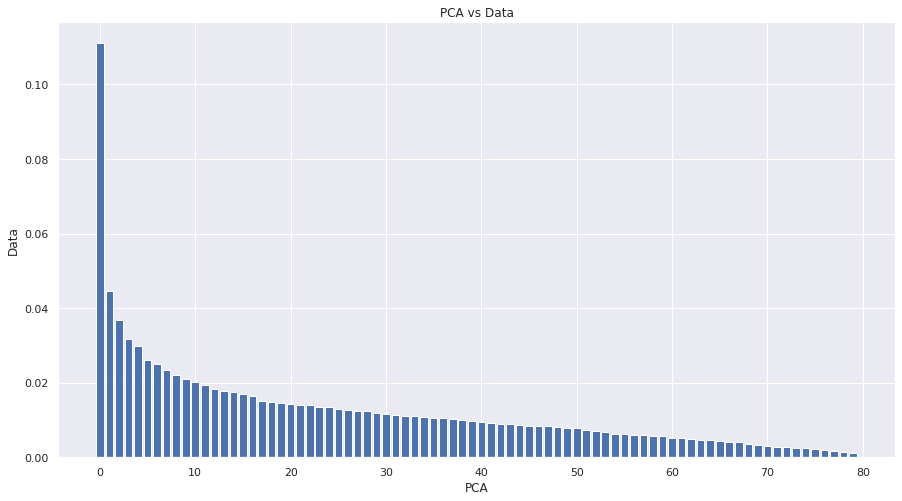

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(range(80),explained_variance,label='Information Gained by each PCA')
plt.xlabel('PCA')
plt.ylabel('Data')
plt.title('PCA vs Data')

As per PCA criteria , 95% of data is enough for building the Model
by checking with the explained variance ratio, number of components that occupies the 95% data - **63 PCA lines which occupies 95.359106 of Data in the Given Dataset**

In [ ]:
pca=PCA(n_components=63)

**Fit the data**

In [ ]:
x_new_info=pca.fit_transform(x_norm)

In [ ]:
x_new_info

array([[-2.60848817e+00, -1.19359266e+00,  3.14679142e-01, ...,
         2.89953707e-01, -5.79456755e-01, -4.40963760e-01],
       [-1.02272137e-02,  2.58557998e+00,  4.52152509e-01, ...,
         8.72485942e-01, -9.66773748e-02,  8.61289598e-01],
       [-3.19860401e+00, -1.48465203e+00,  1.40365260e+00, ...,
         4.67943115e-01, -7.25519680e-01, -5.33770129e-01],
       ...,
       [-4.91492107e-01, -9.46492790e-02,  2.50477292e+00, ...,
         2.25723273e-01,  1.36773195e+00,  5.70782419e-01],
       [ 2.44896204e+00,  3.04148523e+00, -1.85095599e+00, ...,
        -2.79020932e-01, -7.00023973e-01, -4.53732110e-01],
       [ 1.07580527e+00,  3.63391238e+00,  2.35768297e-01, ...,
        -2.34585881e-03,  1.31681428e+00,  1.48794722e-01]])

#**Splitting - for PCA model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_new_info,y_dep,test_size=0.2,random_state=1)

The Dependant variable is in continuous data, Regressor is Used

#**Random Forest - Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

**BUild the Model**

In [ ]:
model_rf=RandomForestRegressor(random_state=2)

**Fit the Model** 

In [ ]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

**Machine Predicted** 

In [ ]:
y_pred=model_rf.predict(x_test)

In [ ]:
y_pred

array([218203.91, 185805.08, 122471.56,  88919.36, 137250.5 , 312840.79,
       303139.61, 159977.5 , 203563.34, 235226.  , 166300.1 ,  61243.25,
       215472.35, 327953.07, 213813.19, 107924.5 , 126237.82, 124897.25,
       257365.1 , 127324.82, 110284.57, 118032.56, 199977.08, 352652.09,
        69371.44, 221320.23, 168877.33, 178177.42, 488134.93, 120073.32,
       111880.38, 121175.18, 125710.41,  81129.72, 148142.64, 363760.85,
       124974.13, 100984.26, 227131.8 , 124967.87, 131542.85, 133317.97,
        91566.2 , 120865.05, 187732.49, 156856.5 , 118338.64, 199941.62,
       269514.32, 221801.8 ,  94170.19, 214812.88, 123024.17, 219614.3 ,
       213968.14, 103128.08, 120452.75, 186613.12, 115253.09, 187852.5 ,
       138693.09, 239697.75,  75809.37, 136142.07, 143199.21, 128941.87,
       126066.25, 206323.97, 171911.5 , 132422.34, 168853.11,  97036.5 ,
       318521.13, 167600.37, 165759.55, 210777.81, 178408.04, 131577.09,
       381226.95, 268824.  , 191957.85, 119432.75, 

#**Accuracy of the Model**

In [ ]:
model_rf.score(x_test,y_test)

0.8000657561783784

#**Mean Square Error**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

1425919705.9641285

#**Root Mean Square**

In [ ]:
root_mean=np.sqrt(MSE)
root_mean

37761.35201451516

#**DataFrame for Actual and Machine Predicted**

In [ ]:
f_com=pd.DataFrame({'Actual':y_test,'Machine_Predicted':y_pred})
f_com

,Actual,Machine_Predicted
258,231500,218203.91
267,179500,185805.08
288,122000,122471.56
649,84500,88919.36
1233,142000,137250.50
...,...,...
163,103200,107889.25
47,249700,241974.35
1432,64500,120583.05
98,83000,108297.55


#**Residual**

In [ ]:
Residual=y_test-y_pred
Residual

258     13296.09
267     -6305.08
288      -471.56
649     -4419.36
1233     4749.50
          ...   
163     -4689.25
47       7725.65
1432   -56083.05
98     -25297.55
409     28890.05
Name: SalePrice, Length: 292, dtype: float64

#**Graphical Representation for Actual and Machine Predicted**

In [ ]:
x_test.shape

(292, 63)

In [ ]:
comp_g=f_com.head(100)

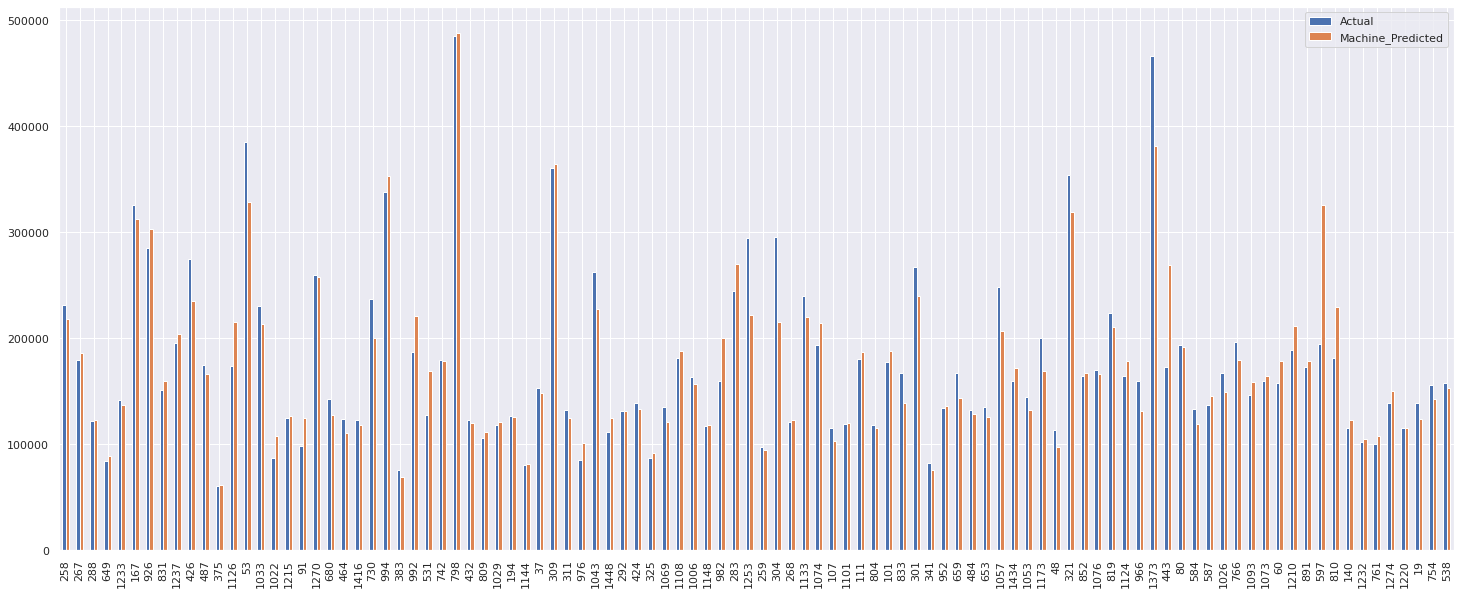

In [ ]:
comp_g.plot(kind='bar',figsize=(25,10));

**Distribution Plot Graph**

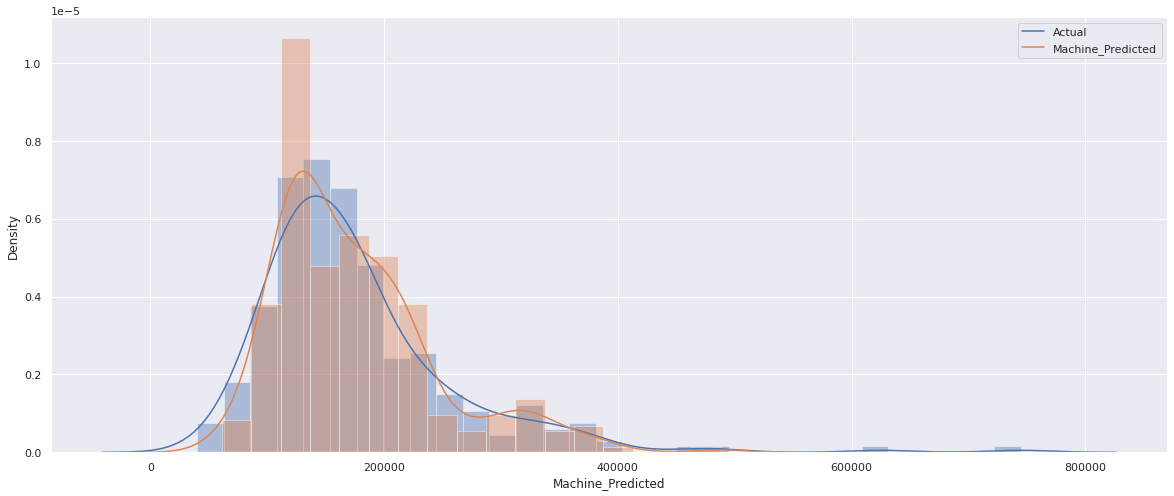

In [ ]:
sns.distplot(f_com['Actual'])
sns.distplot(f_com['Machine_Predicted'])
plt.legend(['Actual','Machine_Predicted'])

#**Split - without compression using PCA**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_norm,y_dep,test_size=0.2,random_state=1)

#**Random Forest - Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

**Build the Model**

In [ ]:
model_RF=RandomForestRegressor(random_state=2)

**Fit the Model**

In [ ]:
model_RF.fit(x_train1,y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

**Machine Predicted**

In [ ]:
y_pred_RF=model_RF.predict(x_test1)

#**Accuracy of the Model - Without PCA**

In [ ]:
model_RF.score(x_test1,y_test1)

0.8102228803622507

#**Mean Square Error**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE1=mean_squared_error(y_test1,y_pred_RF)
MSE1

1353479671.41642

#**Root Mean Square**

In [ ]:
root_mean1=np.sqrt(MSE1)
root_mean1

36789.6679981815

In [ ]:
f_com1=pd.DataFrame({'Actual':y_test1,'Machine_Predicted':y_pred_RF})
f_com1

,Actual,Machine_Predicted
258,231500,210389.53
267,179500,162486.46
288,122000,120314.00
649,84500,82254.71
1233,142000,147764.47
...,...,...
163,103200,100109.74
47,249700,252255.40
1432,64500,122553.61
98,83000,102552.84


In [ ]:
Residual1=y_test1-y_pred_RF
Residual1

258     21110.47
267     17013.54
288      1686.00
649      2245.29
1233    -5764.47
          ...   
163      3090.26
47      -2555.40
1432   -58053.61
98     -19552.84
409     24157.69
Name: SalePrice, Length: 292, dtype: float64

#**Graphical Representation for Actual and Machine Predicted**

In [ ]:
x_test.shape

(292, 63)

In [ ]:
comp_RF=f_com1.head(100)

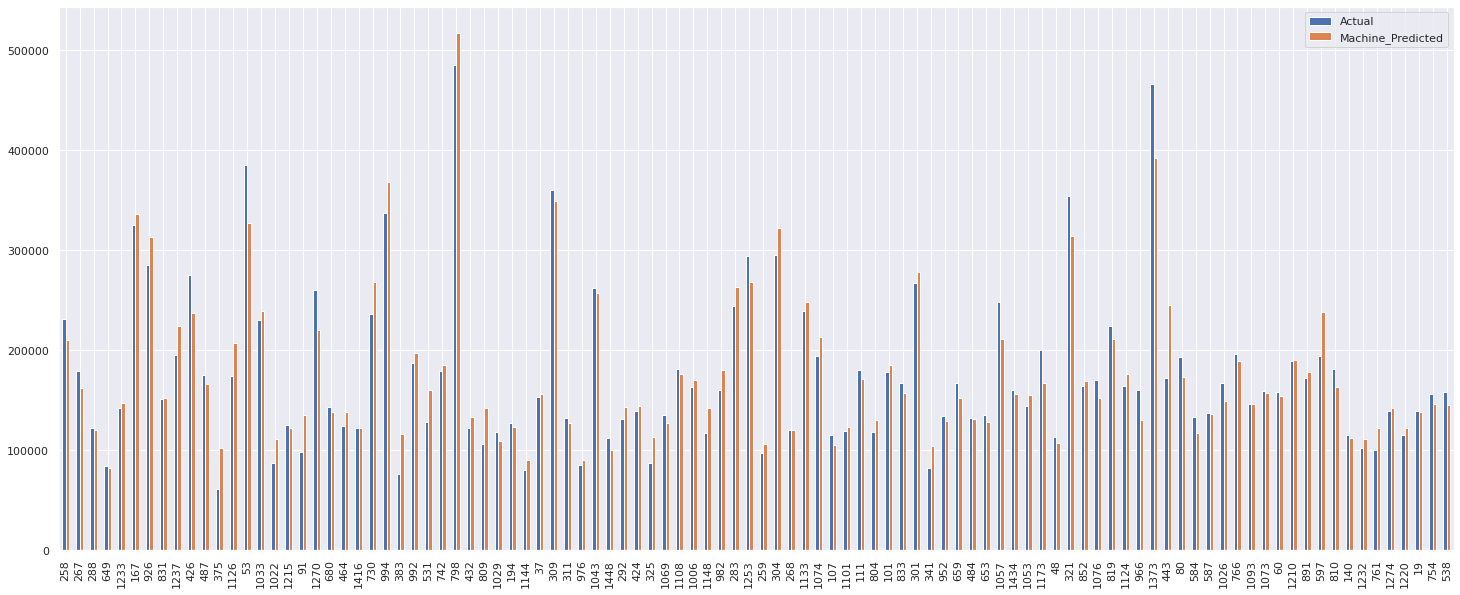

In [ ]:
comp_RF.plot(kind='bar',figsize=(25,10));

**Distribution Plot Graph**

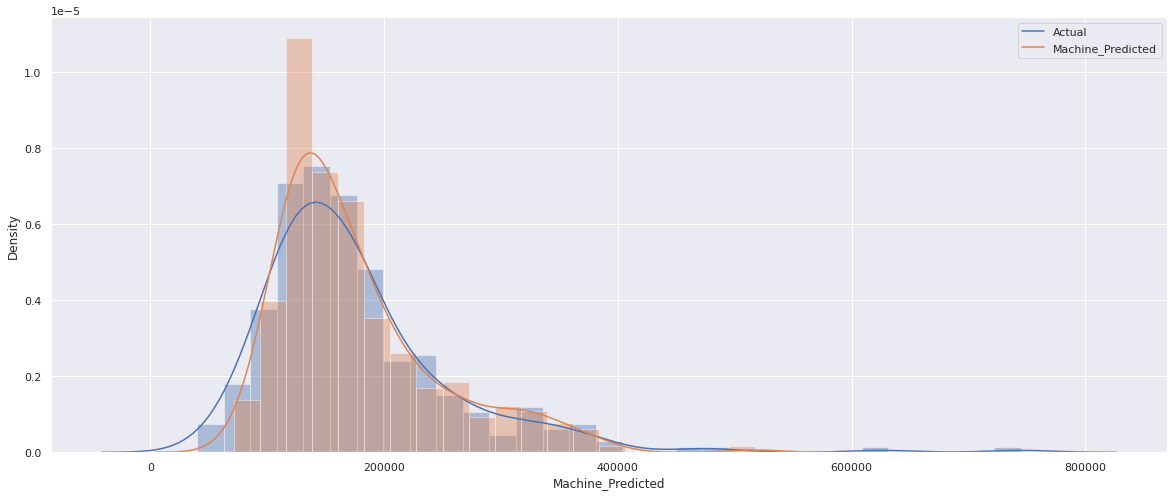

In [ ]:
sns.distplot(f_com1['Actual'])
sns.distplot(f_com1['Machine_Predicted'])
plt.legend(['Actual','Machine_Predicted'])

#By checking with the Accuracy of **Random Forest Regressor** on **Principle Component Analysis (PCA)** and Without **Principle Component Analysis (PCA)**

#Accuracy - Random Forest Regressor - With PCA - **0.8000657561783784**

#Accuracy - Random Forest Regressor - Without PCA -**0.8102228803622507**

#Both Accuracy are near the Range of **(80-81%)**, with a difference of **1%** 


#**The Principle Component Analysis (PCA) Criteria fits the Data and the independant data is compressed and the compressed data does not affects the Data or Accuracy of the Model**